<a href="https://colab.research.google.com/github/jimmyoxes/CS623_DBMS_PROJECT/blob/main/Natural_Disaster_and%20S%26P_500.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import LSTM, Dense
from datetime import datetime
import sklearn.preprocessing as preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import keras
import seaborn as sns
sns.set()
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder


In [ ]:
!pip install tensor

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 37.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.0/63.0 kB 7.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 30.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.0/80.0 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 53.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 247.8/247.8 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.2 MB/s eta 0:00:00
  Created wheel for tensor: filename=tensor-0.3.6-py3-none-any.whl size=71552 sha256=f6e17cd544a707bccf429d2307d78d57b7e549b527e1cff884872d8167dc1986
  Stored in directory: /root/.cache/pip/wheels/b8/d7/e8/f4760f8bcef039fce5899d36f67a

In [ ]:
df= pd.read_csv('/content/1900_2021_DISASTERS.xlsx - emdat data.csv')

In [ ]:
df.head()

,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,Country,...,No Affected,No Homeless,Total Affected,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1900,9002,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,Cabo Verde,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
1,1900,9001,NaN,Natural,Climatological,Drought,Drought,NaN,NaN,India,...,NaN,NaN,NaN,NaN,NaN,3.221647,NaN,NaN,NaN,NaN
2,1902,12,NaN,Natural,Geophysical,Earthquake,Ground movement,NaN,NaN,Guatemala,...,NaN,NaN,NaN,NaN,25000.0,3.350513,NaN,NaN,NaN,NaN
3,1902,3,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN
4,1902,10,NaN,Natural,Geophysical,Volcanic activity,Ash fall,NaN,Santa Maria,Guatemala,...,NaN,NaN,NaN,NaN,NaN,3.350513,NaN,NaN,NaN,NaN


In [ ]:
# Convert the 'Start Day' column to a datetime type
df['Start Day'] = pd.to_datetime(df['Start Day'], format='%d')

# Format the 'Start Day' column as two digits
df['Start Day'] = df['Start Day'].dt.strftime('%d')

In [ ]:
# Convert the 'Start Month' column to a datetime type
df['Start Month'] = pd.to_datetime(df['Start Month'], format='%m')

# Format the 'Start Month' column as two digits
df['Start Month'] = df['Start Month'].dt.strftime('%m')

In [ ]:
# Convert the 'Start Year' column to a datetime type
df['End Day'] = pd.to_datetime(df['End Day'], format='%d')

# Format the 'Start Day' column as two digits
df['End Day'] = df['End Day'].dt.strftime('%d')

In [ ]:
# Convert the 'End Month' column to a datetime type
df['End Month'] = pd.to_datetime(df['End Month'], format='%m')

# Format the 'End Month' column as two digits
df['End Month'] = df['End Month'].dt.strftime('%m')

In [ ]:
df['Date'] = pd.to_datetime(df[['Year', 'Start Month', 'Start Day']].astype(str).apply(' '.join, axis=1), format='%Y %m %d', errors='ignore')

In [ ]:
df['End Date'] = pd.to_datetime(df[['End Year', 'End Month', 'End Day']].astype(str).apply(' '.join, axis=1), format='%Y %m %d', errors='ignore')

In [ ]:
df1 = df[(df['Date'] >= '2010-01-01') & (df['Date'] <= '2021-09-07')]

In [ ]:
df1 = df[(df['End Date'] >= '2010-01-01') & (df['End Date'] <= '2023-09-07')]

In [ ]:
pd.options.mode.copy_on_write = True

In [ ]:
columns_to_delete = ['Admin1 Code','Location','Disaster Group','Dis Mag Value','Continent','Dis Mag Scale','Disaster Subtype','Latitude','Event Name','Disaster Subgroup','Admin2 Code', 'Origin','Disaster Subsubtype', 'Appeal', 'River Basin','Total Affected','No Injured','No Affected','Adm Level','OFDA Response','Declaration','Seq', 'ISO', 'Geo Locations', 'Aid Contribution', 'Associated Dis', 'Associated Dis2', 'Local Time', 'Region', 'Longitude','ISO','Glide', 'No Homeless']
df1.drop(columns=columns_to_delete, inplace=True)


In [ ]:
# Check which columns are present in the DataFrame
existing_columns = df1.columns

# Modify the columns_to_delete list to include only existing columns
columns_to_delete = [col for col in columns_to_delete if col in existing_columns]

# Drop the specified columns from the DataFrame
df1.drop(columns=columns_to_delete, inplace=True)


In [ ]:
# Replace 'nan' values in the 'End Date' column with a placeholder
df1['End Date'].fillna('9999-12-31', inplace=True)

# Convert 'End Date' column to datetime format
df1['End Date'] = pd.to_datetime(df1['End Date'], errors='coerce')

# Extract year from 'End Date' column
df1['Year'] = df1['End Date'].dt.year

# Replace NaN values in the 'Year' column with the corresponding year extracted from the 'End Date' column
df1['Year'].fillna(pd.to_datetime(df1['End Date']).dt.year, inplace=True)

# Drop the 'End Date' column if it's no longer needed
df1.drop(columns=['End Date'], inplace=True)

# Drop rows with NaN values in the 'Year' column
df1.dropna(subset=['Year'], inplace=True)


<ipython-input-16-8f46d2026c2a>:5: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df1['End Date'] = pd.to_datetime(df1['End Date'], errors='coerce')


In [ ]:
columns_to_delete = ['Year','Start Year', 'Start Month','Start Day','End Day','End Year', 'End Month']
df1.drop(columns=columns_to_delete, inplace=True)

In [ ]:
df1.dropna(inplace=True)

In [ ]:
df1.isnull().sum()

Disaster Type                 0
Country                       0
Total Deaths                  0
Insured Damages ('000 US$)    0
Total Damages ('000 US$)      0
CPI                           0
Date                          0
dtype: int64

In [ ]:
df1.head(10)

,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Date
11372,Flood,Australia,35.0,2500000.0,7300000.0,84.252733,2010 12 25
11434,Flood,Colombia,418.0,14000.0,1000000.0,84.252733,2010 04 06
11516,Flood,Brazil,900.0,50000.0,1000000.0,86.912465,2011 01 11
11522,Flood,China,467.0,195000.0,6400000.0,86.912465,2011 06 01
11530,Storm,Australia,1.0,1300000.0,2500000.0,86.912465,2011 02 02
11554,Flood,Canada,5.0,157000.0,800000.0,86.912465,2011 04 04
11576,Earthquake,Spain,10.0,100000.0,200000.0,86.912465,2011 05 11
11933,Earthquake,Japan,19846.0,37500000.0,210000000.0,86.912465,2011 03 11
11943,Flood,Thailand,813.0,10000000.0,40000000.0,86.912465,2011 08 05
11948,Storm,United States of America (the),39.0,1425000.0,1900000.0,86.912465,2011 01 31


In [ ]:
df1.shape

(261, 7)

In [ ]:
stock_data= pd.read_csv('/content/sp500_stocks.csv')

In [ ]:
stock_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume
0,2010-01-04,MMM,54.180626,83.019997,83.449997,82.669998,83.089996,3043700.0
1,2010-01-05,MMM,53.841267,82.500000,83.230003,81.699997,82.800003,2847000.0
2,2010-01-06,MMM,54.604828,83.669998,84.599998,83.510002,83.879997,5268500.0
3,2010-01-07,MMM,54.643997,83.730003,83.760002,82.120003,83.320000,4470100.0
4,2010-01-08,MMM,55.029030,84.320000,84.320000,83.300003,83.690002,3405800.0


In [ ]:
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format='%Y-%m-%d')


In [ ]:
stock_data.dropna(inplace=True)

In [ ]:
stock_data.isnull().sum()

Date         0
Symbol       0
Adj Close    0
Close        0
High         0
Low          0
Open         0
Volume       0
dtype: int64

In [ ]:
# Descriptive statistics for stock market data (adjust columns as needed)
print("Stock Market Data Statistics:")
print(stock_data[["Open", "High", "Low", 'Close', "Adj Close"]].describe())  # Focus on specific columns

Stock Market Data Statistics:
               Open          High           Low         Close     Adj Close
count  1.703725e+06  1.703725e+06  1.703725e+06  1.703725e+06  1.703725e+06
mean   1.024272e+02  1.035740e+02  1.012647e+02  1.024489e+02  9.676629e+01
std    1.927674e+02  1.951372e+02  1.904791e+02  1.928531e+02  1.932016e+02
min    7.000000e-01  7.100000e-01  6.500000e-01  7.000000e-01  7.000000e-01
25%    3.531000e+01  3.570000e+01  3.491000e+01  3.531000e+01  3.009693e+01
50%    6.205000e+01  6.270816e+01  6.140000e+01  6.207000e+01  5.498955e+01
75%    1.115500e+02  1.127500e+02  1.103400e+02  1.115800e+02  1.044430e+02
max    7.365770e+03  7.423730e+03  7.256840e+03  7.416010e+03  7.416010e+03


In [ ]:
df1['Date'].value_counts()

Date
2017 09 08    4
2016 04 16    3
2017 09 17    2
2017 06 22    2
2013 06 12    2
             ..
2013 05 26    1
2013 12 01    1
2013 04 07    1
2013 03 18    1
2020 08 16    1
Name: count, Length: 235, dtype: int64

In [ ]:
# Drop rows with NaN values in the 'Date' column
df1.dropna(subset=['Date'], inplace=True)


In [ ]:
# Specify the indices of the rows to be deleted
indices_to_delete = [14843, 15581]

# Drop rows with the specified indices
df1.drop(indices_to_delete, inplace=True)


In [ ]:
df1[df1['Date'].str.contains('nan')]

,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Date


In [ ]:
df1['Date'] = pd.to_datetime(df1['Date'])


<ipython-input-33-9fe283079361>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Count', y='Country', data=top_10_countries, palette='viridis')


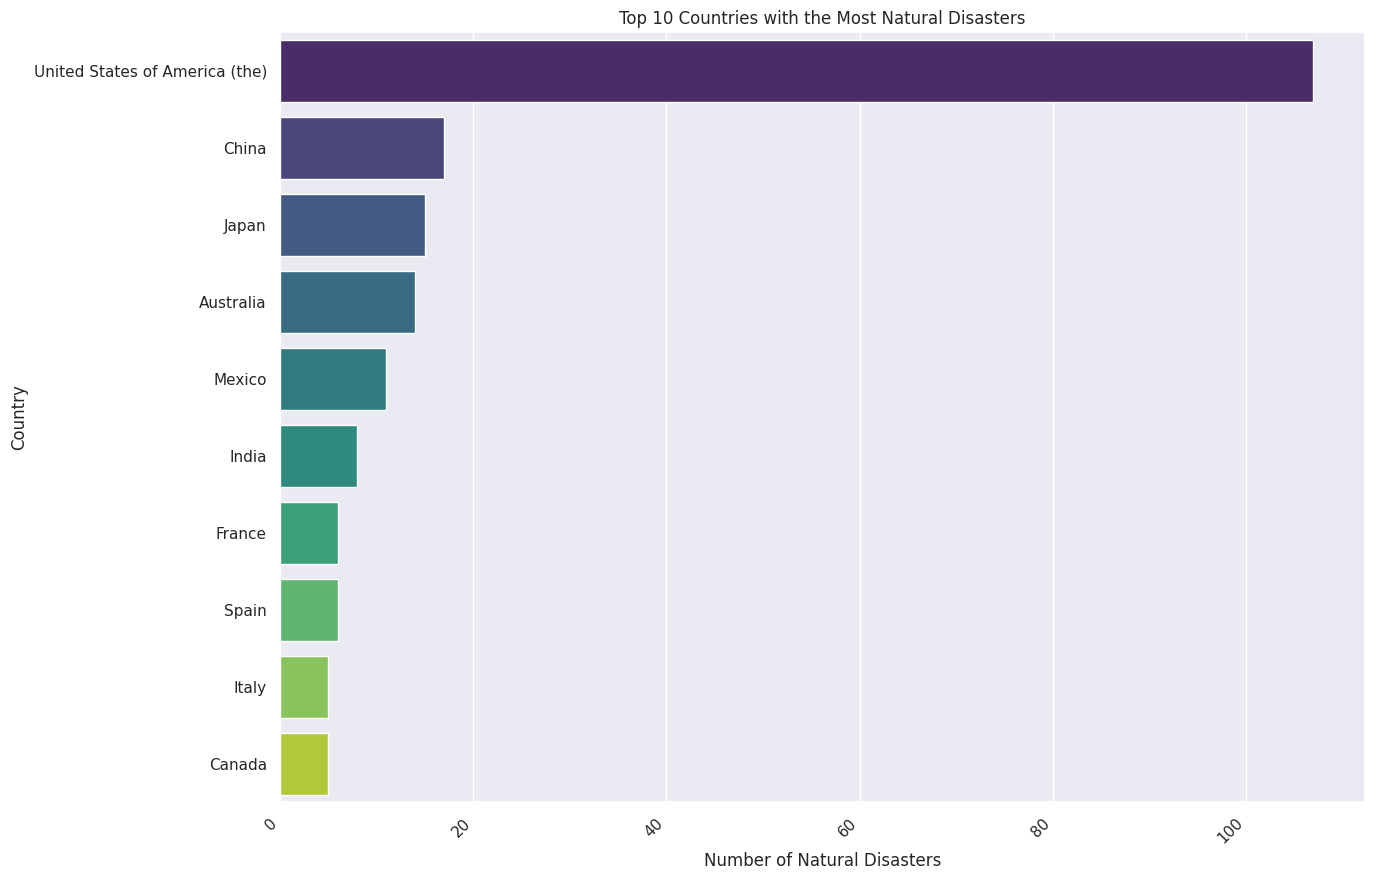

In [ ]:
# Count occurrences of each country
country_counts = df1['Country'].value_counts().reset_index()
country_counts.columns = ['Country', 'Count']

# Sort the DataFrame by count in descending order
country_counts = country_counts.sort_values(by='Count', ascending=False)

# Select only the first 10 rows (top 10 countries)
top_10_countries = country_counts.head(10)

# Plotting the bar chart with adjusted size and rotated labels
plt.figure(figsize=(14, 10))
sns.barplot(x='Count', y='Country', data=top_10_countries, palette='viridis')
plt.title('Top 10 Countries with the Most Natural Disasters')
plt.xlabel('Number of Natural Disasters')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')  # Rotate labels for better readability
plt.show()

In [ ]:
df1 = df1.dropna()  # Fix typo: inplace=True is missing

In [ ]:
merged_data = pd.merge(stock_data, df1, on='Date', how='inner')


In [ ]:
merged_data.head()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),CPI
0,2010-04-06,MMM,55.410088,84.349998,84.470001,83.550003,83.900002,3208500.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733
1,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1264800.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733
2,2010-04-06,ABT,18.614559,25.352633,25.486977,25.227884,25.367025,15102334.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733
3,2010-04-06,ACN,32.539833,41.520000,42.310001,41.450001,42.020000,5802000.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733
4,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,4211400.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733


In [ ]:
merged_data.isnull().sum(axis=0)

Date                          0
Symbol                        0
Adj Close                     0
Close                         0
High                          0
Low                           0
Open                          0
Volume                        0
Disaster Type                 0
Country                       0
Total Deaths                  0
Insured Damages ('000 US$)    0
Total Damages ('000 US$)      0
CPI                           0
dtype: int64

In [ ]:

print("Natural Disaster Statistics:")
print(merged_data.describe(include="all"))  # Include categorical data

Natural Disaster Statistics:
                                 Date Symbol     Adj Close         Close  \
count                           80704  80704  80704.000000  80704.000000   
unique                            NaN    498           NaN           NaN   
top                               NaN    MMM           NaN           NaN   
freq                              NaN    170           NaN           NaN   
mean    2015-05-07 10:22:33.568596480    NaN     69.440945     76.970852   
min               2010-04-06 00:00:00    NaN      0.730000      0.730000   
25%               2013-01-17 00:00:00    NaN     26.801414     32.381325   
50%               2015-09-09 00:00:00    NaN     45.787470     53.650002   
75%               2017-06-07 00:00:00    NaN     77.750193     87.311928   
max               2020-09-11 00:00:00    NaN   4218.279785   4218.279785   
std                               NaN    NaN    120.335432    120.915737   

                High           Low          Open        Vo

In [ ]:
merged_data.shape

(80704, 14)

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

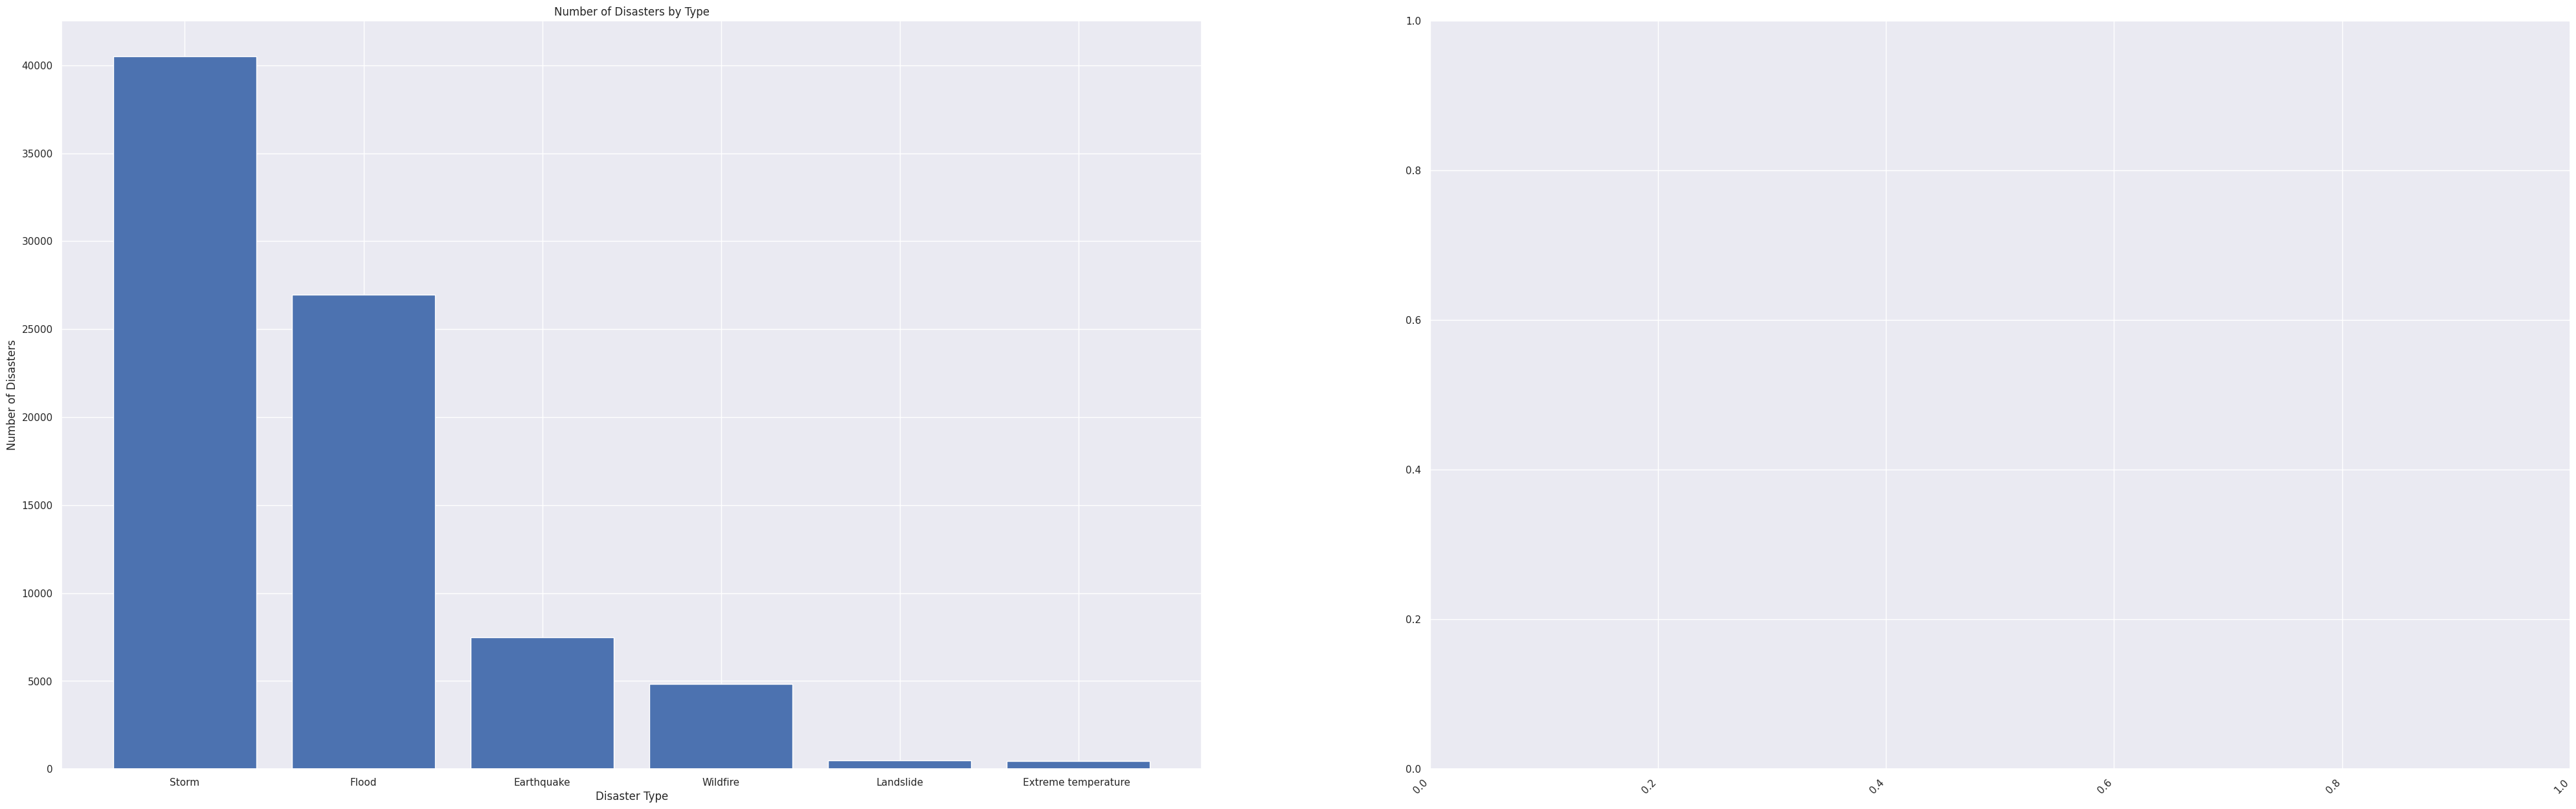

In [ ]:
# Assuming columns named 'Disaster_Type' (or similar) and 'Fatalities'
disaster_counts = merged_data['Disaster Type'].value_counts()  # Count disasters by type
total_fatalities = merged_data['Total Deaths'].sum()  # Total lives lost

# Create the figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(50,15))

# Subplot 1: Disaster Count Bar Plot
ax1.bar(disaster_counts.index, disaster_counts.values)
ax1.set_xlabel("Disaster Type")
ax1.set_ylabel("Number of Disasters")
ax1.set_title("Number of Disasters by Type")
plt.xticks(rotation=45, ha="right")  # Rotate x-axis labels for readability


In [ ]:

# Function to calculate average return within a window
def calculate_avg_return(window_data):
  # Assuming 'Adj Close' column exists for adjusted closing prices
  daily_returns = window_data['Adj Close'].pct_change()
  return daily_returns.mean()

print("Imports and function definition completed.")


Imports and function definition completed.


In [ ]:
# Define pre-event, event, and post-event window sizes (in days)
pre_window = 5  # Adjust as needed
event_window = 1  # Adjust as needed (consider disaster duration)
post_window = 10  # Adjust as needed

print(f"Pre-event window: {pre_window} days")
print(f"Event window: {event_window} days")
print(f"Post-event window: {post_window} days")

Pre-event window: 5 days
Event window: 1 days
Post-event window: 10 days


In [ ]:
# Filter data for disaster events (assuming 'Disaster Type' is not null)
disaster_data = merged_data[merged_data['Disaster Type'].notnull()]

print(f"Number of disaster events found: {len(disaster_data)}")


Number of disaster events found: 80704


In [ ]:
stock_companies= pd.read_csv('/content/sp500_companies.csv')

In [ ]:
stock_companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 384 entries, 0 to 383
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Exchange             384 non-null    object 
 1   Symbol               384 non-null    object 
 2   Shortname            384 non-null    object 
 3   Longname             384 non-null    object 
 4   Sector               384 non-null    object 
 5   Industry             384 non-null    object 
 6   Currentprice         384 non-null    float64
 7   Marketcap            384 non-null    int64  
 8   Ebitda               364 non-null    float64
 9   Revenuegrowth        381 non-null    float64
 10  City                 384 non-null    object 
 11  State                371 non-null    object 
 12  Country              384 non-null    object 
 13  Fulltimeemployees    323 non-null    float64
 14  Longbusinesssummary  384 non-null    object 
 15  Weight               384 non-null    flo

In [ ]:
stock_companies.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,405.65,3014157926400,1.184270e+11,0.176,Redmond,WA,United States,221000.0,Microsoft Corporation develops and supports so...,0.103002
1,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,693.32,1712500506624,2.216100e+10,2.055,Santa Clara,CA,United States,26196.0,"NVIDIA Corporation provides graphics, and comp...",0.058521
2,NMS,META,"Meta Platforms, Inc.","Meta Platforms, Inc.",Communication Services,Internet Content & Information,459.41,1171224526848,6.018400e+10,0.247,Menlo Park,CA,United States,67317.0,"Meta Platforms, Inc. engages in the developmen...",0.040024
3,NYQ,LLY,Eli Lilly and Company,Eli Lilly and Company,Healthcare,Drug Manufacturers—General,706.20,670400643072,1.131630e+10,0.368,Indianapolis,IN,United States,39000.0,"Eli Lilly and Company discovers, develops, and...",0.022909
4,NMS,TSLA,"Tesla, Inc.","Tesla, Inc.",Consumer Cyclical,Auto Manufacturers,181.06,576638091264,1.355800e+10,0.035,Austin,TX,United States,140473.0,"Tesla, Inc. designs, develops, manufactures, l...",0.019705


In [ ]:
columns_to_drop = ['State', 'Shortname', 'City', 'Currentprice','Marketcap','Longbusinesssummary', 'Fulltimeemployees', 'Exchange', 'Country']
stock_companies.drop(columns=columns_to_drop, inplace=True)

In [ ]:
added_data=  pd.merge(merged_data, stock_companies, on='Symbol', how='left')

In [ ]:
added_data.shape

(80704, 20)

In [ ]:
added_data.dropna()

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,Disaster Type,Country,Total Deaths,Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Longname,Sector,Industry,Ebitda,Revenuegrowth,Weight
106,2010-04-06,CTSH,23.915232,26.125000,26.305000,25.770000,25.790001,4534000.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733,Cognizant Technology Solutions Corporation,Technology,Information Technology Services,3.436000e+09,0.008,0.001329
107,2010-04-06,CL,30.470882,42.465000,42.660000,42.154999,42.645000,4068200.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733,Colgate-Palmolive Company,Consumer Defensive,Household & Personal Products,4.489000e+09,0.069,0.002366
108,2010-04-06,CMCSA,7.106455,9.380000,9.460000,9.290000,9.340000,22708600.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733,Comcast Corporation,Communication Services,Telecom Services,3.764900e+10,0.023,0.006090
110,2010-04-06,CAG,13.466902,19.470818,19.533073,19.291828,19.517509,7998225.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733,"Conagra Brands, Inc.",Consumer Defensive,Packaged Foods,2.271700e+09,-0.032,0.000467
111,2010-04-06,COP,27.103926,40.631474,40.730576,40.326546,40.532372,9739392.0,Flood,Colombia,418.0,14000.0,1000000.0,84.252733,ConocoPhillips,Energy,Oil & Gas E&P,2.548700e+10,-0.322,0.004462
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80698,2020-09-11,XYL,83.237892,84.550003,84.870003,82.070000,82.580002,781600.0,Storm,United States of America (the),8.0,3500000.0,6300000.0,100.000000,Xylem Inc.,Industrials,Specialty Industrial Machinery,1.119000e+09,0.504,0.000940
80699,2020-09-11,YUM,87.001862,92.269997,93.430000,91.500000,92.639999,1246500.0,Storm,United States of America (the),8.0,3500000.0,6300000.0,100.000000,"Yum! Brands, Inc.",Consumer Cyclical,Restaurants,2.503000e+09,0.041,0.001210
80700,2020-09-11,ZBRA,249.960007,249.960007,253.220001,249.509995,252.580002,225900.0,Storm,United States of America (the),8.0,3500000.0,6300000.0,100.000000,Zebra Technologies Corporation,Technology,Communication Equipment,9.430000e+08,-0.306,0.000425
80701,2020-09-11,ZBH,133.792282,135.155334,136.825241,134.543686,136.106796,641793.0,Storm,United States of America (the),8.0,3500000.0,6300000.0,100.000000,"Zimmer Biomet Holdings, Inc.",Healthcare,Medical Devices,2.372000e+09,0.050,0.000895


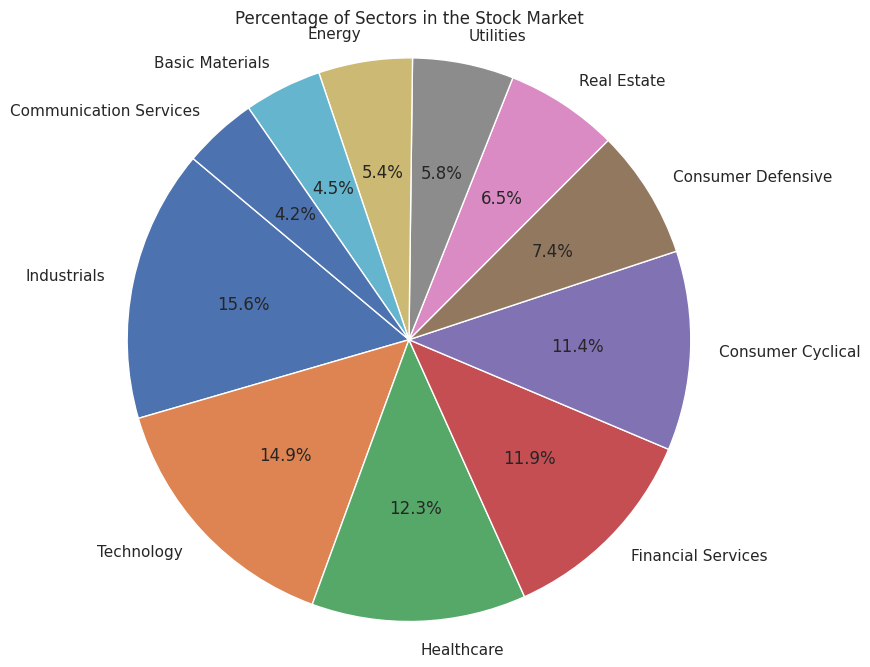

Total number of companies: 378


In [ ]:
# Calculate the count of sectors
sector_counts = added_data['Sector'].value_counts()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(sector_counts, labels=sector_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Sectors in the Stock Market')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()


# Count the number of unique companies
total_companies = added_data['Longname'].nunique()

print("Total number of companies:", total_companies)

In [ ]:
disaster_data = added_data[added_data['Disaster Type'].notna()]


In [ ]:
disaster_groups = disaster_data.groupby(['Disaster Type', 'Sector'])


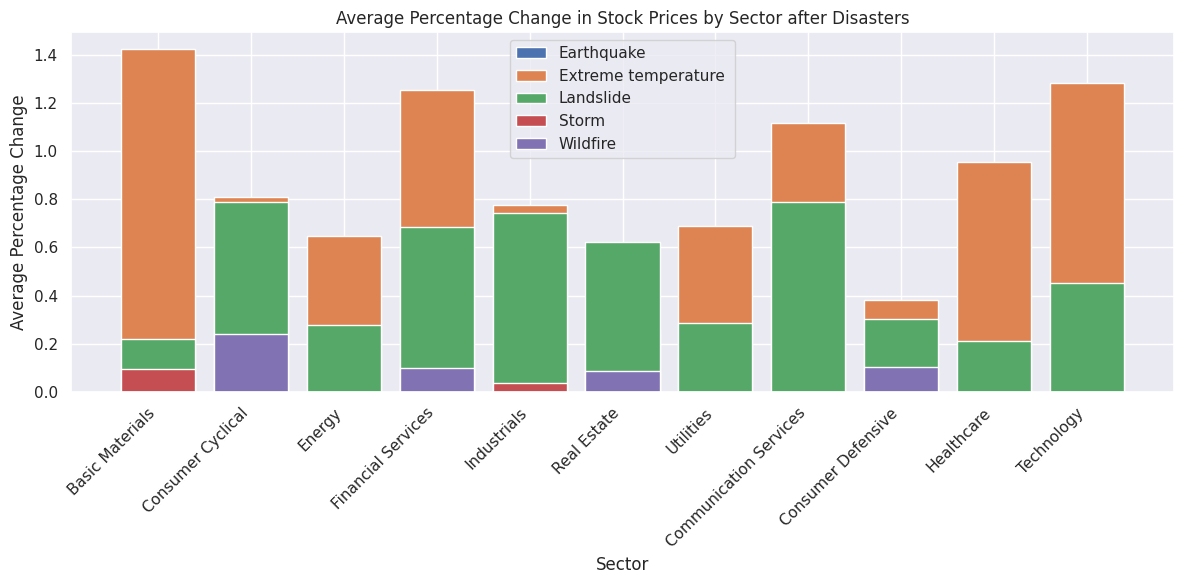

In [ ]:

# Calculate percentage change in stock prices
added_data['Percentage Change'] = (added_data['Close'] - added_data['Open']) / added_data['Open'] * 100

# Group by disaster type and sector/industry to find the average percentage change
average_percentage_change = added_data.groupby(['Disaster Type', 'Sector'])['Percentage Change'].mean().reset_index()

# Filter out sectors/industries with positive average percentage change after a disaster
positive_changes = average_percentage_change[average_percentage_change['Percentage Change'] > 0]

# Plotting
plt.figure(figsize=(12, 6))
for disaster_type, data in positive_changes.groupby('Disaster Type'):
    plt.bar(data['Sector'], data['Percentage Change'], label=disaster_type)

plt.xlabel('Sector')
plt.ylabel('Average Percentage Change')
plt.title('Average Percentage Change in Stock Prices by Sector after Disasters')
plt.legend()
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
added_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80704 entries, 0 to 80703
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   Date                        80704 non-null  datetime64[ns]
 1   Symbol                      80704 non-null  object        
 2   Adj Close                   80704 non-null  float64       
 3   Close                       80704 non-null  float64       
 4   High                        80704 non-null  float64       
 5   Low                         80704 non-null  float64       
 6   Open                        80704 non-null  float64       
 7   Volume                      80704 non-null  float64       
 8   Disaster Type               80704 non-null  object        
 9   Country                     80704 non-null  object        
 10  Total Deaths                80704 non-null  float64       
 11  Insured Damages ('000 US$)  80704 non-null  float64   

In [ ]:
# List of all unique disaster types
disaster_types = added_data['Disaster Type'].unique()

# Iterate over each unique disaster type
for disaster_type in disaster_types:
    # Create a new column for the current disaster type and set it to 1 if it matches, 0 otherwise
    added_data[disaster_type] = (added_data['Disaster Type'] == disaster_type).astype(int)


In [ ]:
columns_to_delete = ["Insured Damages ('000 US$)", "Disaster Type","Total Damages ('000 US$)",'Total Deaths','Longname','Industry','Country','Sector']
added_data.drop(columns=columns_to_delete, inplace=True)

In [ ]:
added_data.head(50)

,Date,Symbol,Adj Close,Close,High,Low,Open,Volume,CPI,Ebitda,Revenuegrowth,Weight,Percentage Change,Flood,Storm,Extreme temperature,Earthquake,Wildfire,Landslide
0,2010-04-06,MMM,55.410088,84.349998,84.470001,83.550003,83.900002,3208500.0,84.252733,NaN,NaN,NaN,0.536349,1,0,0,0,0,0
1,2010-04-06,AOS,7.473090,8.988333,9.040000,8.858333,8.888333,1264800.0,84.252733,NaN,NaN,NaN,1.125064,1,0,0,0,0,0
2,2010-04-06,ABT,18.614559,25.352633,25.486977,25.227884,25.367025,15102334.0,84.252733,NaN,NaN,NaN,-0.056738,1,0,0,0,0,0
3,2010-04-06,ACN,32.539833,41.520000,42.310001,41.450001,42.020000,5802000.0,84.252733,NaN,NaN,NaN,-1.189910,1,0,0,0,0,0
4,2010-04-06,ADBE,35.700001,35.700001,35.930000,35.549999,35.560001,4211400.0,84.252733,NaN,NaN,NaN,0.393699,1,0,0,0,0,0
5,2010-04-06,AMD,9.350000,9.350000,9.490000,9.180000,9.440000,18738400.0,84.252733,NaN,NaN,NaN,-0.953381,1,0,0,0,0,0
6,2010-04-06,AES,8.785050,11.810000,11.860000,11.480000,11.530000,8670800.0,84.252733,NaN,NaN,NaN,2.428454,1,0,0,0,0,0
7,2010-04-06,AFL,20.804886,27.980000,28.059999,27.559999,27.610001,4903200.0,84.252733,NaN,NaN,NaN,1.340090,1,0,0,0,0,0
8,2010-04-06,A,22.254118,24.721029,24.814020,24.620888,24.778255,3499054.0,84.252733,NaN,NaN,NaN,-0.230953,1,0,0,0,0,0
9,2010-04-06,APD,48.972721,69.037926,69.093430,68.251617,68.344124,936470.0,84.252733,NaN,NaN,NaN,1.015160,1,0,0,0,0,0


In [ ]:
columns_to_delete = ['Symbol']
added_data.drop(columns=columns_to_delete, inplace=True)

In [ ]:
added_data.dropna(inplace=True)

In [ ]:
# Convert 'Date' column to datetime format
added_data['Date'] = pd.to_datetime(added_data['Date'])

# Sort data by date (assuming it's not already sorted)
added_data.sort_values('Date', inplace=True)

# Set 'Date' column as the index
added_data.set_index('Date', inplace=True)

In [ ]:
# Convert specific columns from int to float
columns_to_convert = ['Flood', 'Storm', 'Earthquake','Wildfire','Landslide','Extreme temperature ']
added_data[columns_to_convert] = added_data[columns_to_convert].astype(float)


In [ ]:
added_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 57623 entries, 2010-04-06 to 2020-09-11
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Adj Close             57623 non-null  float64
 1   Close                 57623 non-null  float64
 2   High                  57623 non-null  float64
 3   Low                   57623 non-null  float64
 4   Open                  57623 non-null  float64
 5   Volume                57623 non-null  float64
 6   CPI                   57623 non-null  float64
 7   Ebitda                57623 non-null  float64
 8   Revenuegrowth         57623 non-null  float64
 9   Weight                57623 non-null  float64
 10  Percentage Change     57623 non-null  float64
 11  Flood                 57623 non-null  float64
 12  Storm                 57623 non-null  float64
 13  Extreme temperature   57623 non-null  float64
 14  Earthquake            57623 non-null  float64
 15  Wi

In [ ]:
non_normalized_data = added_data[['Open','Adj Close','High','Low','Volume','Percentage Change']]

In [ ]:
normalized_data= added_data[['Storm', 'Wildfire','Earthquake', 'Flood', 'Extreme temperature ']]

In [ ]:
added = added_data.copy()

In [ ]:
# Calculate quartiles
Q1 = np.percentile(added, 25)
Q3 = np.percentile(added, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define bounds
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Clip outliers
added[added > upper_bound] = upper_bound
added[added < lower_bound] = lower_bound


In [ ]:
# prompt: provide range for minmax scaler 0 to 1
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_data = scaler.fit_transform(non_normalized_data)


In [ ]:
#Normalized features that are not normalized

scaler = MinMaxScaler(feature_range=(0, 1))
normalized_features= scaler.fit_transform(non_normalized_data)

In [ ]:
normalized_label = scaler.fit_transform(added['Close'].to_numpy().reshape(-1, 1))

In [ ]:
#Features and Labels
features = np.concatenate((non_normalized_data,normalized_data), axis=1)
labels = added_data['Close']

In [ ]:
normalized_data2= added_data[['Storm']]

In [ ]:
#Features and Labels
features2 = np.concatenate((non_normalized_data,normalized_data2), axis=1)

In [ ]:
#added2 = added_data['']

In [ ]:
# Train-validation-test split
X_train, X_val_test, y_train, y_val_test = train_test_split(features, normalized_label, test_size=0.2, random_state=42)

# Further split the validation set into validation and test sets
X_val, X_test, y_val, y_test = train_test_split(X_val_test, y_val_test, test_size=0.5, random_state=42)

# Print the shapes of the splits
print("X_train shape:", X_train.shape)
print("X_val shape:", X_val.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_val shape:", y_val.shape)
print("y_test shape:", y_test.shape)


X_train shape: (46098, 12)
X_val shape: (5762, 12)
X_test shape: (5763, 12)
y_train shape: (46098, 1)
y_val shape: (5762, 1)
y_test shape: (5763, 1)


In [ ]:
# Import the necessary module
from sklearn.model_selection import train_test_split

# Train-validation-test split
X_train1, X_val_test1, y_train1, y_val_test1 = train_test_split(features2, normalized_label, test_size=0.2, random_state=42) # Use the correct function name 'train_test_split'

# Further split the validation set into validation and test sets
X_val1, X_test1, y_val1, y_test1 = train_test_split(X_val_test1, y_val_test1, test_size=0.5, random_state=42) # Use the correct function name 'train_test_split'

# Print the shapes of the splits
print("X_train1 shape:", X_train1.shape)
print("X_val1 shape:", X_val1.shape)
print("X_test1 shape:", X_test1.shape)
print("y_train1 shape:", y_train1.shape)
print("y_val1 shape:", y_val1.shape)
print("y_test1 shape:", y_test1.shape)

X_train1 shape: (46098, 7)
X_val1 shape: (5762, 7)
X_test1 shape: (5763, 7)
y_train1 shape: (46098, 1)
y_val1 shape: (5762, 1)
y_test1 shape: (5763, 1)


In [ ]:
model = Sequential()  # Adjust for 1 feature
model.add(LSTM(64, return_sequences=True, input_shape=(1, X_train.shape[1])))  # Adjust for actual shape
model.add(Dropout(0.1))

model.add(LSTM(64))
model.add(Dense(1))


In [ ]:
model = Sequential()  # Adjust for 1 feature
model.add(LSTM(64, return_sequences=True, input_shape=(1, X_train1.shape[1])))  # Adjust for actual shape
model.add(Dropout(0.1))

model.add(LSTM(64))
model.add(Dense(1))


In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor = 'val_loss', patience=5, verbose =2)

In [ ]:
model.compile(optimizer='adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 1, 64)             18432     
                                                                 
 dropout_1 (Dropout)         (None, 1, 64)             0         
                                                                 
 lstm_3 (LSTM)               (None, 64)                33024     
                                                                 
 dense_1 (Dense)             (None, 1)                 65        
                                                                 
Total params: 51521 (201.25 KB)
Trainable params: 51521 (201.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
import numpy as np

# Reshape input data to add a time step dimension
X_train = np.expand_dims(X_train, axis=1)
X_test = np.expand_dims(X_test, axis=1)


In [ ]:
# Reshape input data to add a time step dimension
X_train1 = np.expand_dims(X_train1, axis=1)
X_test1 = np.expand_dims(X_test1, axis=1)


In [ ]:
print(data.shape)  # Print the shape of data to verify it has at least two dimensions


(4, 3)


In [ ]:
# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test), callbacks=[early_stopping])

Epoch 1/10
1441/1441 [==============================] - 17s 7ms/step - loss: 0.0542 - val_loss: 0.0546
Epoch 2/10
1441/1441 [==============================] - 7s 5ms/step - loss: 0.0536 - val_loss: 0.0531
Epoch 3/10
1441/1441 [==============================] - 9s 6ms/step - loss: 0.0536 - val_loss: 0.0529
Epoch 4/10
1441/1441 [==============================] - 8s 5ms/step - loss: 0.0535 - val_loss: 0.0527
Epoch 5/10
1441/1441 [==============================] - 9s 6ms/step - loss: 0.0535 - val_loss: 0.0528
Epoch 6/10
1441/1441 [==============================] - 9s 7ms/step - loss: 0.0535 - val_loss: 0.0528
Epoch 7/10
1441/1441 [==============================] - 7s 5ms/step - loss: 0.0534 - val_loss: 0.0527
Epoch 8/10
1441/1441 [==============================] - 9s 6ms/step - loss: 0.0533 - val_loss: 0.0527
Epoch 9/10
1441/1441 [==============================] - 7s 5ms/step - loss: 0.0532 - val_loss: 0.0525
Epoch 10/10
1441/1441 [==============================] - 10s 7ms/step - loss: 0.0

In [ ]:
# Compile and train the model
model.compile(optimizer='adam', loss='mse')
model.fit(X_train1, y_train1, epochs=10, validation_data1=(X_test1, y_test1), callbacks=[early_stopping])

In [ ]:
# Evaluate the model on the test data
test_loss = model.evaluate(X_test, y_test)

# Print the test loss
print("Test Loss:", test_loss)


181/181 [==============================] - 0s 2ms/step - loss: 0.0524
Test Loss: 0.05241180211305618
